# Exploring the Shared Datasets in the LSST Science Platform
<br>Owner(s): **Phil Marshall** ([@drphilmarshall](https://github.com/LSSTScienceCollaborations/StackClub/issues/new?body=@drphilmarshall)), **Rob Morgan** ([@rmorgan10](https://github.com/LSSTScienceCollaborations/StackClub/issues/new?body=@rmorgan10))
<br>Last Verified to Run: **2018-11-17**
<br>Verified Stack Release: **16.0**

In this notebook we'll take a look at some of the datasets available on the LSST Science Platform. 

### Learning Objectives:

After working through this tutorial you should be able to: 
1. Start figuring out which of the available datasets is going to be of most use to you in any given project; 

When it is finished, you should be able to use the `stackclub.Taster` to:
2. Report on the available data in a given dataset;
3. Plot the patches and tracts in a given dataset on the sky.

### Logistics
This notebook is intended to be runnable on `lsst-lspdev.ncsa.illinois.edu` from a local git clone of https://github.com/LSSTScienceCollaborations/StackClub.

## Set-up

We'll need the `stackclub` package to be installed. If you are not developing this package, you can install it using `pip`, like this:
```
pip install git+git://github.com/LSSTScienceCollaborations/StackClub.git#egg=stackclub
```
If you are developing the `stackclub` package (eg by adding modules to it to support the Stack Club tutorial that you are writing, you'll need to make a local, editable installation. In the top level folder of the `StackClub` repo, do:

In [ ]:
! cd .. && python setup.py -q develop --user && cd -

When editing the `stackclub` package files, we want the latest version to be imported when we re-run the import command. To enable this, we need the %autoreload magic command.

In [ ]:
%load_ext autoreload
%autoreload 2

For accessing the datasets using the Butler, and then visualizing the results, we'll need the following modules:

In [9]:
%matplotlib inline
# %matplotlib ipympl

import os, glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import IFrame, display, Markdown

In [1]:
import stackclub

You can find the Stack version that this notebook is running by using eups list -s on the terminal command line:

In [ ]:
# What version of the Stack am I using?
! echo $HOSTNAME
! eups list -s | grep lsst_distrib

## Listing the Available Datasets
First, let's look at what is currently available. There are two primary shared dataset folders in the LSP, the read-only `/datasets` folder, and the group-writeable folder `/project/shared/data`. Let's see what's in there

**`/project/shared/data`:** These datasets are designed to be small test sets, ideal for tutorials.

In [ ]:
shared_datasets = ! ls -d /project/shared/data/* | grep -v README
shared_datasets

In [ ]:
%%bash
shared_datasets=$( ls -d /project/shared/data/* | grep -v README )
for dataset in $shared_datasets; do
    du -sh $dataset
done

**`/datasets`:**
These are typically much bigger: to measure the size, uncomment the second cell below and edit it to target the dataset you are interested in. Running `du` on all folders takes several minutes.

In [ ]:
datasets = ! ls -d /datasets/* | grep -v USAGE | grep -v html
datasets

In [ ]:
# %%bash
# datasets=$( ls -d /datasets/* | grep -v USAGE | grep -v html )
# for dataset in $datasets; do
#     du -h $dataset
# done

## Exploring the Data Repo with the Stack Club `Taster`

The `stackclub` library provides a `Taster` class, to explore the datasets in a given repo. As an example, let's take a look at some HSC data using the `Taster`.

In [2]:
depth = 'UDEEP' # WIDE, DEEP, UDEEP
field = 'SSP_WIDE' # SSP_WIDE, SSP_DEEP, SSP_UDEEP
repo = '/datasets/hsc/repo/rerun/DM-13666/%s/'%(depth)

In [3]:
tarquin = stackclub.Taster(repo, vb=True)

The taster, `tarquin`, carries a butler around with it:

In [6]:
type(tarquin.butler)

lsst.daf.persistence.butler.Butler

It uses this butler to search the repo for datasets, skymaps etc.

In [7]:
tarquin.look_for_datasets_of_type(['raw', 'calexp', 'deepCoadd_calexp', 'deepCoadd_mergeDet'])

raw dataset exists.
calexp dataset exists.
deepCoadd_calexp dataset doesn't exist.
deepCoadd_mergeDet dataset doesn't exist.


In [4]:
tarquin.look_for_skymap()

deepCoadd_skyMap exists.


The `what_exists` method searches for everything "interesting". In the `taster.py` class, interesting currently consists of 
* `'raw'`
* `'calexp'` 
* `'src'`
* `'deepCoadd_calexp'`
* `'deepCoadd_mergeDet'` 

but this method can easily be updated to include more dataset types.

In [ ]:
tarquin.what_exists()

This dictionary is stored in the `exists` attribute:

In [38]:
tarquin.exists

{'raw': True,
 'calexp': True,
 'deepCoadd_calexp': False,
 'deepCoadd_mergeDet': False,
 'deepCoadd_skyMap': True}

The `Taster` can report on the data available, counting the number of visits, sources, etc, according to what's in the repo. It uses methods like this one:

In [5]:
tarquin.estimate_sky_area()

Total Sky Area (deg$^2$) :  31.040258236830155


31.04

and this one:

In [ ]:
tarquin.count_things()

print(tarquin.counts)

To have your `Taster` do all the above, and just report on what it finds, do:

In [6]:
tarquin.report()

raw dataset exists.
calexp dataset exists.
src dataset exists.
deepCoadd_calexp dataset doesn't exist.
deepCoadd_mergeDet dataset doesn't exist.
deepCoadd_skyMap exists.


### /datasets/hsc/repo/rerun/DM-13666/UDEEP/

|   Metadata Characteristics  |  | 
  | :---: | --- | 
 | Number of Tracts |  11 | 
| Total Sky Area (deg$^2$) |  31.04 | 
| Number of Visits |  10333 | 
| Number of Pointings |  133 | 
| Number of Sensor Visits |  112 | 
| Number of Fields |  60 | 
| Number of Filters |  13 | 
| Number of Sources |  1154258 | 


If you are interested in learning which fields, filters, visits, etc. have been counted by Tarquin, remember that Tarquin carries a Butler around with it, so you can run typical Butler methods. For example, you can look at the filters like this:

In [ ]:
tarquin.butler.queryMetadata('calexp', ['filter'])

In [7]:
tarquin.plot_sky_coverage()

For more on the `Taster`'s methods, do:

In [ ]:
#help(tarquin)

## Example Tastings

Let's compare the WIDE, DEEP and UDEEP parts of the HSC dataset.

In [ ]:
for depth in ['WIDE', 'DEEP', 'UDEEP']:
    repo = '/datasets/hsc/repo/rerun/DM-13666/%s/'%(depth)
    taster = stackclub.Taster(repo)
    taster.report()

Hmm. The sky area is different but the `calexp` and `src` data is the same? Weird.

The following loops over all shared datasets fails in interesting ways: some folders don't seem to be `Butler`-friendly. We need to do a bit more work to identify the actual repos available to us.

In [ ]:
for repo in shared_datasets:
    try:
        taster = stackclub.Taster(repo)
        taster.report()
    except:
        print("Taster failed to explore repo ",repo)

In [ ]:
for repo in datasets:
    try:
        taster = stackclub.Taster(repo)
        taster.report()
    except:
        print("Taster failed to explore repo ",repo)

## Visualizing Sky Coverage
In this section, we'll plot the available patches and tracts in a given dataset on the sky, following the LSST DESC tutorial [dm_butler_skymap.ipynb](https://github.com/LSSTDESC/DC2-analysis/blob/master/tutorials/dm_butler_skymap.ipynb). In fact, we will _import_ this notebook, so that we can re-use its functions. This operation is handled by the `stackclub.wimport` function.

In [ ]:
dm_butler_skymap_notebook = "https://github.com/LSSTDESC/DC2-analysis/raw/master/tutorials/dm_butler_skymap.ipynb"

skymapper = stackclub.wimport(dm_butler_skymap_notebook, vb=True)

> BUG: remote notebooks are not yet `wimport`-able. A workaround could be to import the downloaded file explicitly. This is not yet working, hence the commented out failed attempt below.

In [ ]:
# import sys, os
# import stackclub
# sys.path.append(os.getcwd() + '/.downloads')

In [ ]:
# import dm_butler_skymap

Now we can attempt to plot the available tracts, using the `plot_skymap_tract()` function.

In [21]:
# repo = "/project/shared/data/Twinkles_subset/output_data_v2"
repo = "/datasets/hsc/repo/rerun/DM-13666/UDEEP"
butler = dafPersist.Butler(repo)

# Glob the merged coadd folder for the tracts that have data.  Unfortunately, this information is not
# directly accessible from the data butler.
tracts = sorted([int(os.path.basename(x)) for x in
                 glob.glob(os.path.join(repo, 'deepCoadd-results', 'merged', '*'))])

# How many tracts do we have?
print("Found {} tracts".format(len(tracts)))

Found 11 tracts


In [ ]:
"""
Uncomment this cell when the `wimport` bug is fixed (or avoided).

# Now, loop over all the tracts, plotting them as gray, numbered, rectangles:
ax = None
for tract in tracts:
    skyMap = butler.get('deepCoadd_skyMap')
    ax = skymapper.plot_skymap_tract(skyMap, tract=tract, title='', ax=ax)
""";

For now, I have added Jim's notebook to this directory. We can decide later on the best way to import the functionality, but this should work for the time being.

For our purposes, I don't know that it is necessary to show as much detail as Jim does in his notebook. As a start, I am just showing how to plot the tracts based on the RA and Dec of their inner boxes. I have also added this plotting capability to `taster.py` as the `plot_sky_coverage` function. If we want to overlay the focal plane and color the individual visits, we can take some lines of code from Jim's notebook. However, my inclination is to wait to see what functionality the Gen3 Butler will provide before spending too much time on making the perfect visualization.

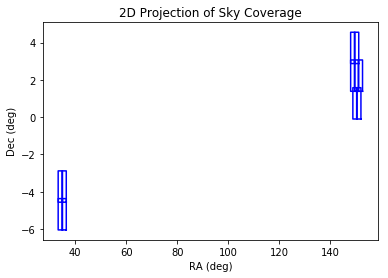

In [10]:
plt.figure()

for tract in tarquin.tracts:
    tractInfo = tarquin.skyMap[tract]
    
    corners = [(x[0].asDegrees(), x[1].asDegrees()) for x in tractInfo.getVertexList()]
    x = [k[0] for k in corners] + [corners[0][0]]
    y = [k[1] for k in corners] + [corners[0][1]]
    
    plt.plot(x,y, color='b')
    
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('2D Projection of Sky Coverage')

plt.show()


In `taster.py` I added a call to make this plot in the `report` function, but for some reason the plot does not show up when the `report` function is called. I need some help figuring out why this is happening.

## Summary

In this notebook we took a first look at the datasets available to us in two shared directories in the LSST science platform filesystem.